In [86]:
# importing the dataset
import pandas as pd
data = pd.read_csv('D:/Sai Manoj P/projects/CustomerSegmentationAnalysis/cleaned_data.csv')

In [87]:
data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
AgeGroup                   0
dtype: int64

imported the cleaned dataset, so no cleaning operations will be performed.

In [88]:
data.shape

(1041614, 11)

In [89]:
#Exploratory data analysis
data.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'Age', 'AgeGroup'],
      dtype='object')

In [90]:
data.describe() 

,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age
count,1041614.00,1041614.00,1041614.00,1041614.00
mean,114998.61,157122.12,1566.10,41.11
std,846760.94,51263.52,6561.46,42.90
min,0.00,0.00,0.00,0.00
25%,4728.14,124041.00,160.00,25.00
50%,16768.52,164247.00,457.50,29.00
75%,57428.85,200022.00,1200.00,36.00
max,115035495.10,235959.00,1560034.99,217.00


Let's analyze transaction patterns and trends within the dataset.

Let's explore whether customer accountBalance or the day of the week has a significant impact on transaction frequency.

In [91]:
# Fetching the account balance of each customer
account_bal_data = data.groupby('CustomerID')['CustAccountBalance'].sum().reset_index(name='total')

# Fetching the number of transactions made by each customer 
transaction_count = data.groupby('CustomerID')['TransactionID'].count().reset_index(name='total')

# Calculating the correlation coefficient between CustAccountBalance and number of transactions
corr_coef = transaction_count['total'].corr(account_bal_data['total'])
corr_coef

0.056656464684361266

Based on the correlation coefficient, we can conclude that there is a very weak positive correlation.The correlation is so weak that it doesn't provide meaningful predictive power, and the variations in transaction frequency are not significantly influenced by variations in account balances.

Let's explore trend in days

In [92]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Extracting the day of the week and create a new column 'DayOfWeek'
data['DayOfWeek'] = data['TransactionDate'].dt.day_name()

# Fetching the transactions count based on the day of week
day_transaction_count = data['DayOfWeek'].value_counts()
day_transaction_count

DayOfWeek
Sunday       170795
Monday       154424
Thursday     150333
Saturday     147611
Tuesday      144667
Wednesday    141186
Friday       132598
Name: count, dtype: int64

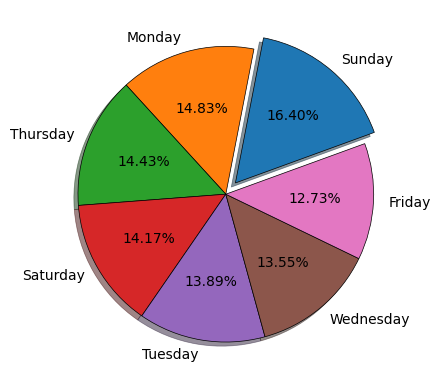

In [93]:
# Plotting the percentage of day wise transactions 
import matplotlib.pyplot as plt

values = day_transaction_count.values
labels = day_transaction_count.index
explode= [0.1,0,0,0,0,0,0]

plt.pie(values, labels= labels, autopct= '%1.2f%%',shadow= True, explode= explode, startangle= 20,
        wedgeprops={"edgecolor":"k",'linewidth': 0.5,'linestyle': '-'})
plt.show()


It doesn't appear that there is a significant trend in transaction data for each day of the week. While Sunday has the highest number of transactions with a slight edge, the differences between the transaction counts for each day of the week are not substantial.

Let's generate new segment features in the dataset based on the number of months, transaction frequency, and total transaction amount, and then analyze the relationships and their impacts.

In [94]:
# calculating the data is of which period
unique_months = data['TransactionDate'].dt.month.unique()
unique_months

array([ 8, 10,  9])

The data consists of transactions for months august,september and october.

Creating a feature in the dataset, which shows that customer made transactions in all the three months, two months or once.

In [95]:
# Extracting the month column
data['TransactionMonth'] = data['TransactionDate'].dt.month

In [96]:
# verifying the calculation of number of months
data.groupby('CustomerID')['TransactionMonth'].nunique().reset_index(name='MonthCount')

,CustomerID,MonthCount
0,C1010011,2
1,C1010012,1
2,C1010014,1
3,C1010018,1
4,C1010024,1
...,...,...
879353,C9099836,1
879354,C9099877,1
879355,C9099919,1
879356,C9099941,1


In [97]:
# checking that calculation done correctly 
data[data['CustomerID']=='C1010011']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup,DayOfWeek,TransactionMonth
33469,T33671,C1010011,1992-08-19,F,NOIDA,32500.73,2016-09-26,123813,4750.00,24,Middle-Age,Monday,9
172258,T173509,C1010011,1983-08-05,M,NEW DELHI,120180.54,2016-08-09,11229,356.00,33,Middle-Age,Tuesday,8


the customerid - C1010011 made transactions in both august and september. so, the month count is 2.

In [98]:
data.head(2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup,DayOfWeek,TransactionMonth
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00,22,Middle-Age,Tuesday,8
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00,59,Elderly,Tuesday,8


In [99]:
# Group by 'CustomerID' and calculate the number of unique months
customer_month_counts = data.groupby('CustomerID')['TransactionMonth'].nunique().reset_index(name='MonthCount')

# Create a dictionary to map month counts to segments
segment_mapping = {
    3: 'Regular',
    2: 'Casual',
    1: 'Occasional'
}

# Map the month counts to segments and assign the result to 'Segment1' column
customer_month_counts['monthFrequencySegment'] = customer_month_counts['MonthCount'].map(segment_mapping)
customer_month_counts

,CustomerID,MonthCount,monthFrequencySegment
0,C1010011,2,Casual
1,C1010012,1,Occasional
2,C1010014,1,Occasional
3,C1010018,1,Occasional
4,C1010024,1,Occasional
...,...,...,...
879353,C9099836,1,Occasional
879354,C9099877,1,Occasional
879355,C9099919,1,Occasional
879356,C9099941,1,Occasional


to validate, segmentation is done correctly take random customerID from each segment and check their transaction months

In [100]:
# Regular - C7818719, Casual - C7923455, Occasional - C4417068
data[data['CustomerID'].isin(['C7818719','C7923455','C4417068'])]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup,DayOfWeek,TransactionMonth
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.00,20,Young,Tuesday,8
40,T42,C7923455,1992-10-06,M,ANDHERI (EAST) MUMBAI,5810.82,2016-08-03,221111,12.00,24,Middle-Age,Wednesday,8
347,T351,C7818719,1992-03-03,M,BADDI,18381.01,2016-10-21,193012,100.00,24,Middle-Age,Friday,10
508301,T511921,C7818719,1978-06-15,M,MUMBAI,2685.81,2016-08-19,170041,800.00,38,Middle-Age,Friday,8
787685,T793207,C7923455,1992-03-25,M,MOHALI,6786.39,2016-09-05,104227,16.00,24,Middle-Age,Monday,9
881847,T887870,C7818719,1993-06-28,M,DOMBIVALI WEST VISHNUNAGAR THANE,71767.91,2016-09-07,173717,33.00,23,Middle-Age,Wednesday,9


Month segementation is done correctly.

In [101]:
# count based on the month frequency
customer_month_counts['monthFrequencySegment'].value_counts()

monthFrequencySegment
Occasional    808166
Casual         71086
Regular          106
Name: count, dtype: int64

It appears that there is a higher number of customers who make transactions within a single month.

let's create two more segments based on number of transactions and total transaction amount of a customer.

In [102]:
# created a dataframe to store data for new features
transaction_data = pd.DataFrame()

# calculating the number of transactions customer made
transaction_data['transactionFrequency'] = data.groupby('CustomerID')['TransactionID'].count()

# calculating the total of transactions amount 
transaction_data['totalTransactionAmount'] = data.groupby('CustomerID')['TransactionAmount (INR)'].sum()
transaction_data.reset_index(inplace=True)

In [103]:
transaction_data

,CustomerID,transactionFrequency,totalTransactionAmount
0,C1010011,2,5106.00
1,C1010012,1,1499.00
2,C1010014,2,1455.00
3,C1010018,1,30.00
4,C1010024,1,5000.00
...,...,...,...
879353,C9099836,1,691.00
879354,C9099877,1,222.00
879355,C9099919,1,126.00
879356,C9099941,1,50.00


In [104]:
# Validation
data[data['CustomerID']=='C1010011']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup,DayOfWeek,TransactionMonth
33469,T33671,C1010011,1992-08-19,F,NOIDA,32500.73,2016-09-26,123813,4750.00,24,Middle-Age,Monday,9
172258,T173509,C1010011,1983-08-05,M,NEW DELHI,120180.54,2016-08-09,11229,356.00,33,Middle-Age,Tuesday,8


CustomerID - C1010011 has two transactions, so the transaction frequency is 2 and the totalTransactionAmount is 5106(4750+356).

Let's create segments based on transactions.

In [105]:
transaction_data['transactionFrequency'].describe()

count   879358.00
mean         1.18
std          0.45
min          1.00
25%          1.00
50%          1.00
75%          1.00
max          6.00
Name: transactionFrequency, dtype: float64

In [106]:
transaction_data['transactionFrequency'].value_counts()

transactionFrequency
1    737397
2    123651
3     16494
4      1661
5       141
6        14
Name: count, dtype: int64

Observing the right-skewed nature of the data, where a majority of customers have fewer transactions compared to a smaller group with multiple transactions, let's create segments for singleTransaction and multipleTransaction Frequency.

In [107]:
# Created a function for frequency segmentation
def frequency_segmentation(transaction_count):
    if transaction_count <= 1:
        return 'SingleTransaction'
    else:
        return 'MultipleTransaction'

# Assigning the segement values     
transaction_data['transactionFrequencySegment'] = transaction_data['transactionFrequency'].apply(frequency_segmentation)

In [108]:
# Counts based on transaction frequency segments
transaction_data['transactionFrequencySegment'].value_counts()

transactionFrequencySegment
SingleTransaction      737397
MultipleTransaction    141961
Name: count, dtype: int64

In [109]:
# Calculating the average transaction based on transactionFrequencySegment
transaction_data.groupby('transactionFrequencySegment')['totalTransactionAmount'].mean()

transactionFrequencySegment
MultipleTransaction   3347.27
SingleTransaction     1567.79
Name: totalTransactionAmount, dtype: float64

The transaction frequency segment appears to be associated with differences in spending behavior. Customers who engage in multiple transactions have a higher average total transaction amount, while those who make a single transaction tend to spend less on average.

In [110]:
# Getting statistical measures of totalTransactionAmount
transaction_data['totalTransactionAmount'].describe()

#to display numbers without scientific notation
#pd.options.display.float_format = '{:.2f}'.format 

count    879358.00
mean       1855.07
std        7188.32
min           0.00
25%         200.00
50%         533.00
75%        1500.00
max     1560034.99
Name: totalTransactionAmount, dtype: float64

The transaction amounts in the dataset span a wide range, ranging from zero to very high values. The presence of transactions with zero amounts warrants further investigation. Additionally, while 75% of the transactions have amounts below 1500 units, the maximum transaction amount reaches 1,560,034 units, indicating the possibility of outliers that should be examined.

In [111]:
# fetching data with zero transaction amount
transaction_data[transaction_data['totalTransactionAmount']==0]

,CustomerID,transactionFrequency,totalTransactionAmount,transactionFrequencySegment
844,C1013128,1,0.00,SingleTransaction
3076,C1021326,1,0.00,SingleTransaction
3788,C1023939,1,0.00,SingleTransaction
3860,C1024147,1,0.00,SingleTransaction
5741,C1031278,1,0.00,SingleTransaction
...,...,...,...,...
872953,C9026149,1,0.00,SingleTransaction
874494,C9031820,1,0.00,SingleTransaction
874905,C9033153,1,0.00,SingleTransaction
876434,C9038862,1,0.00,SingleTransaction


We have identified 595 transactions with zero amounts, which could be attributed to data entry errors or potentially reflect instances where discounts or promotional offers resulted in zero transaction amounts.

Let's find outliers

In [112]:
# Calculating the IQR (Interquartile Range)
Q1 = transaction_data['totalTransactionAmount'].quantile(0.25)
Q3 = transaction_data['totalTransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = transaction_data[(transaction_data['totalTransactionAmount'] < lower_bound) | (transaction_data['totalTransactionAmount'] > upper_bound)]

# Print or analyze the 'outliers' DataFrame
print("Number of Outliers:", len(outliers))

Number of Outliers: 91113


In [113]:
len(transaction_data)

879358

Let's segment the data based on transaction amounts:  
amounts less than the first quartile (Q1) can be categorized as 'LowSpenders'  
amounts between Q1 and the upper bound (Q3 + 1.5*IQR) as 'MidrangeSpenders' and  
outliers as 'HighSpenders'.

In [114]:
# Define the upper bound for outliers
upper_bound_outliers = 3450

# Create a new column 'spendingSegment' to store segment labels
transaction_data['spendingSegment'] = ''

# Assign segment labels based on the defined criteria
transaction_data.loc[transaction_data['totalTransactionAmount'] < transaction_data['totalTransactionAmount'].quantile(0.25), 'spendingSegment'] = 'LowSpender'
transaction_data.loc[(transaction_data['totalTransactionAmount'] >= transaction_data['totalTransactionAmount'].quantile(0.25)) & (transaction_data['totalTransactionAmount'] <= upper_bound_outliers), 'spendingSegment'] = 'MidrangeSpender'
transaction_data.loc[transaction_data['totalTransactionAmount'] > upper_bound_outliers, 'spendingSegment'] = 'HighSpender'

In [115]:
transaction_data

,CustomerID,transactionFrequency,totalTransactionAmount,transactionFrequencySegment,spendingSegment
0,C1010011,2,5106.00,MultipleTransaction,HighSpender
1,C1010012,1,1499.00,SingleTransaction,MidrangeSpender
2,C1010014,2,1455.00,MultipleTransaction,MidrangeSpender
3,C1010018,1,30.00,SingleTransaction,LowSpender
4,C1010024,1,5000.00,SingleTransaction,HighSpender
...,...,...,...,...,...
879353,C9099836,1,691.00,SingleTransaction,MidrangeSpender
879354,C9099877,1,222.00,SingleTransaction,MidrangeSpender
879355,C9099919,1,126.00,SingleTransaction,LowSpender
879356,C9099941,1,50.00,SingleTransaction,LowSpender


In [116]:
# combining the month count data with transaction data
transaction_data = pd.merge(transaction_data,customer_month_counts,on='CustomerID')
transaction_data

,CustomerID,transactionFrequency,totalTransactionAmount,transactionFrequencySegment,spendingSegment,MonthCount,monthFrequencySegment
0,C1010011,2,5106.00,MultipleTransaction,HighSpender,2,Casual
1,C1010012,1,1499.00,SingleTransaction,MidrangeSpender,1,Occasional
2,C1010014,2,1455.00,MultipleTransaction,MidrangeSpender,1,Occasional
3,C1010018,1,30.00,SingleTransaction,LowSpender,1,Occasional
4,C1010024,1,5000.00,SingleTransaction,HighSpender,1,Occasional
...,...,...,...,...,...,...,...
879353,C9099836,1,691.00,SingleTransaction,MidrangeSpender,1,Occasional
879354,C9099877,1,222.00,SingleTransaction,MidrangeSpender,1,Occasional
879355,C9099919,1,126.00,SingleTransaction,LowSpender,1,Occasional
879356,C9099941,1,50.00,SingleTransaction,LowSpender,1,Occasional


Let's create a customer profile based on all the segemenations done so far.

In [117]:
# Creating customer profile feature
transaction_data['profile'] = transaction_data['monthFrequencySegment']+'_'+transaction_data['transactionFrequencySegment']+'_'+transaction_data['spendingSegment']
transaction_data.tail(2)

,CustomerID,transactionFrequency,totalTransactionAmount,transactionFrequencySegment,spendingSegment,MonthCount,monthFrequencySegment,profile
879356,C9099941,1,50.00,SingleTransaction,LowSpender,1,Occasional,Occasional_SingleTransaction_LowSpender
879357,C9099956,1,855.00,SingleTransaction,MidrangeSpender,1,Occasional,Occasional_SingleTransaction_MidrangeSpender


In [118]:
# Customer profiles and respective number of customers
transaction_data['profile'].value_counts()

profile
Occasional_SingleTransaction_MidrangeSpender      469572
Occasional_SingleTransaction_LowSpender           207380
Occasional_SingleTransaction_HighSpender           60445
Occasional_MultipleTransaction_MidrangeSpender     52573
Casual_MultipleTransaction_MidrangeSpender         52127
Casual_MultipleTransaction_HighSpender             15934
Occasional_MultipleTransaction_HighSpender         14700
Occasional_MultipleTransaction_LowSpender           3496
Casual_MultipleTransaction_LowSpender               3025
Regular_MultipleTransaction_MidrangeSpender           72
Regular_MultipleTransaction_HighSpender               34
Name: count, dtype: int64

Most customers belong to the Occasional_SingleTransaction segment, with a smaller number found in the Regular_MultipleTransaction segment.

Let's explore the average transaction amounts for customers categorized into segments

In [119]:
# Calculated the average transaction amount based on customer profiles
profile_amnt = transaction_data.groupby('profile')['totalTransactionAmount'].mean().reset_index(name='total')
sorted_profile_amnt = profile_amnt.sort_values(by= 'total')
sorted_profile_amnt

,profile,total
7,Occasional_SingleTransaction_LowSpender,84.26
4,Occasional_MultipleTransaction_LowSpender,121.34
1,Casual_MultipleTransaction_LowSpender,122.74
8,Occasional_SingleTransaction_MidrangeSpender,922.08
5,Occasional_MultipleTransaction_MidrangeSpender,1296.77
2,Casual_MultipleTransaction_MidrangeSpender,1329.53
10,Regular_MultipleTransaction_MidrangeSpender,1478.22
3,Occasional_MultipleTransaction_HighSpender,10970.24
0,Casual_MultipleTransaction_HighSpender,10988.43
6,Occasional_SingleTransaction_HighSpender,11673.91


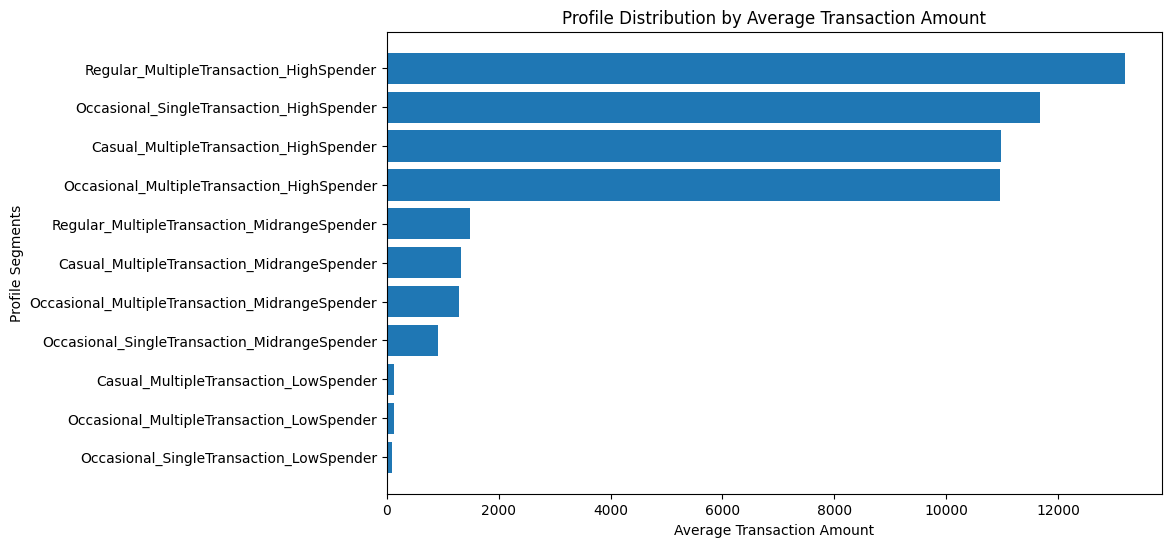

In [120]:
import matplotlib.pyplot as plt

# Creating a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_profile_amnt['profile'], sorted_profile_amnt['total'])
plt.xlabel('Average Transaction Amount')
plt.ylabel('Profile Segments')
plt.title('Profile Distribution by Average Transaction Amount')
plt.show()


From the bar graph, it's evident that occasional_singleTransaction low and medium spenders have lower average transaction amounts, despite their higher customer count within the segment.  
On the other hand, regular_multipleTransaction_highSpenders, although fewer in number, exhibit the highest average spending.  
Notably, occasional_singleTransaction_highSpenders form a significant segment both in terms of customer count and average spending.

In [121]:
# Saving the file
transaction_data.to_csv('transaction_data.csv',index= False)

# final datset
final_data = pd.merge(data, transaction_data, on= 'CustomerID')
final_data.to_csv('final_data.csv',index= False)

### Summary Insights

**Occasional Single Transaction (Low and Medium Spenders)**: High customer count, lower average spend. 

**Regular Multiple Transaction (High Spenders)**: Fewer customers but highest average spending.

**Occasional Single Transaction (High Spenders)**: Significant customer count and above-average spending.

**Actionable Insights**:

**Segment-Specific Marketing**: Tailor marketing for low and medium spenders to increase average transaction value. 

**Retaining High Spenders**: Prioritize high spender retention through personalized experiences and exclusive offers.

**Encourage Occasional High Spenders**: Engage occasional high spenders with targeted campaigns to boost transaction frequency.

These concise insights offer a clear roadmap for optimizing strategies based on customer segments and spending behaviors.